In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes = True)
data = pd.read_csv("C:/Users/Alankrita Klement/Downloads/db.csv")


In [5]:
data.shape

(768, 9)

In [6]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

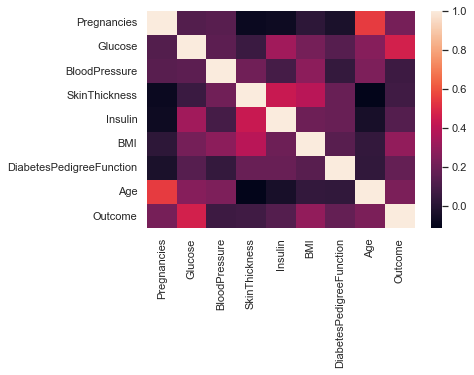

In [8]:
sns.heatmap(data.corr())

<AxesSubplot:>

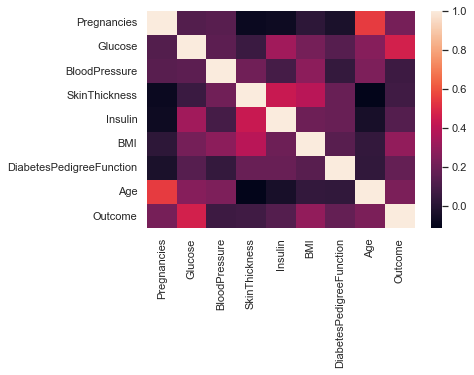

In [9]:
sns.heatmap(data.corr())

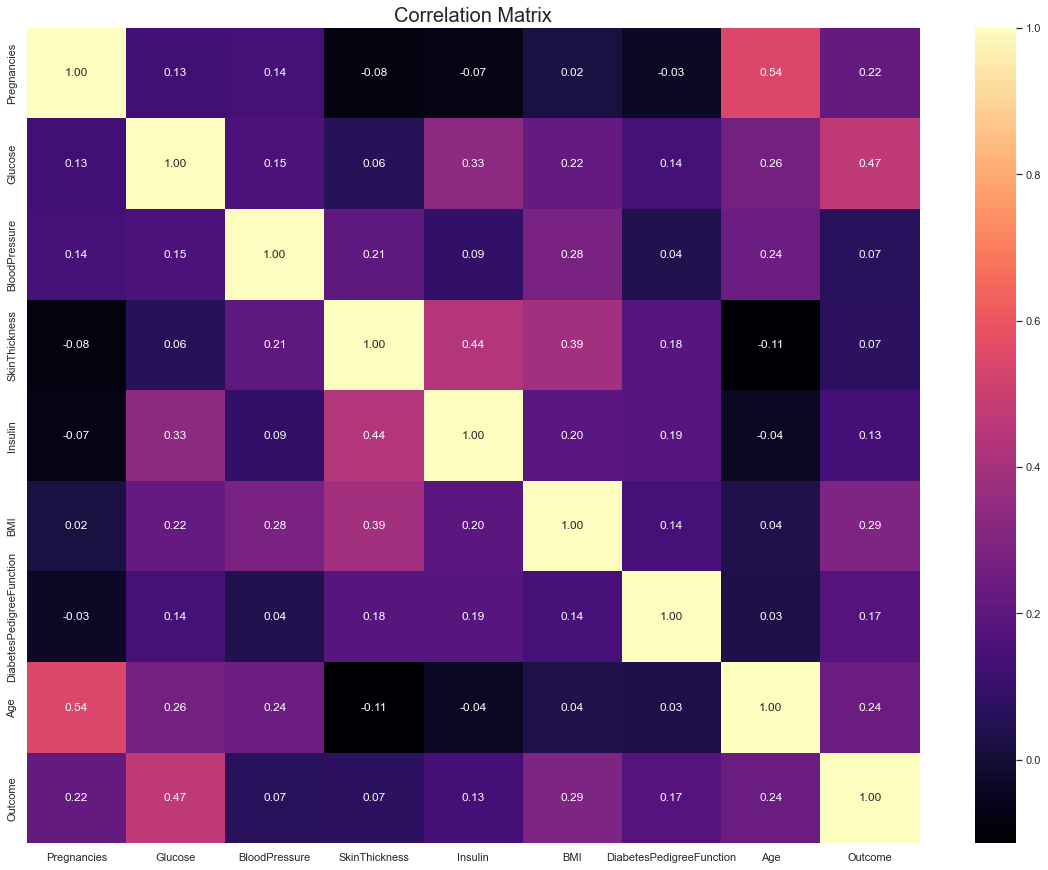

In [10]:

f, ax =plt.subplots(figsize =[20,15])
sns.heatmap(data.corr(), annot=True , fmt = '0.2f' , ax = ax,cmap = "magma")
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()

In [11]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.model_selection import train_test_split
from pandas import DataFrame

col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_data = ['Outcome']

X = data[col_names].values
y = data[target_data].values
split_test_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split_test_size, random_state = 42)

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
trainval = (1.0*len(X_train))/(1.0*len(data.index))
testval = (1.0*len(X_test))/(1.0*len(data.index))
print("{0:0.2f}% in training set".format(trainval*100))
print("{0:0.2f}% in testing set".format(testval*100))

69.92% in training set
30.08% in testing set


In [15]:
trainval = (1.0*len(X_train))/(1.0*len(data.index))
testval = (1.0*len(X_test))/(1.0*len(data.index))
print("{0:0.2f}% in training set".format(trainval*100))
print("{0:0.2f}% in testing set".format(testval*100))
      

69.92% in training set
30.08% in testing set


In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier

df_model = DecisionTreeClassifier(random_state = 42)

df_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [18]:
prediction = df_model.predict(X_train)

In [19]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train,prediction)

print ("Accuracy of our DT model is : {0:.4f}".format(accuracy*100))

Accuracy of our DT model is : 100.0000


In [20]:
df_predict_test = df_model.predict(X_test)

predict_accuracy = metrics.accuracy_score(y_test,df_predict_test)

print("Accuracy of our DT model is :{0:.04f}".format(predict_accuracy*100))

Accuracy of our DT model is :70.1299


In [21]:
print("Confusion Matrix for DT")

print("{0}".format(metrics.confusion_matrix(y_test,df_predict_test,labels=[1,0])))

print("Classifictaion Report for DT")

print("{0}".format(metrics.classification_report(y_test,df_predict_test,labels=[1,0])))

Confusion Matrix for DT
[[ 55  25]
 [ 44 107]]
Classifictaion Report for DT
              precision    recall  f1-score   support

           1       0.56      0.69      0.61        80
           0       0.81      0.71      0.76       151

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



In [22]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
model1.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [23]:
model1.fit(X_test,y_test.ravel())
model1.score(X_test,y_test.ravel())

0.987012987012987

In [24]:
print("Confusion Matrix for Random Forest")

print("{0}".format(metrics.confusion_matrix(y_test,df_predict_test,labels = [1,0])))

print("Classifictaion Report for Random Forest")

print("{0}".format(metrics.classification_report(y_test,df_predict_test,labels = [1,0])))

Confusion Matrix for Random Forest
[[ 55  25]
 [ 44 107]]
Classifictaion Report for Random Forest
              precision    recall  f1-score   support

           1       0.56      0.69      0.61        80
           0       0.81      0.71      0.76       151

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



In [25]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7,random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy : {0:.04f}".format(metrics.accuracy_score(y_test ,lr_predict_test)))

print("Confusion Matrix")


print(metrics.confusion_matrix(y_test,lr_predict_test,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,lr_predict_test, labels =[1,0]))



Accuracy : 0.7403
Confusion Matrix
[[ 50  30]
 [ 30 121]]
Classification Report
              precision    recall  f1-score   support

           1       0.62      0.62      0.62        80
           0       0.80      0.80      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [26]:
from sklearn.svm import SVC
from sklearn import metrics


svm_model = SVC(kernel = 'linear', C=1,random_state =42)

svm_model.fit(X_train,y_train.ravel())

prediction = svm_model.predict(X_train)

accuracy_of_trained_data = metrics.accuracy_score(y_train,prediction)

print("Accuracy of the model is :{0:.4f}".format(accuracy_of_trained_data))



Accuracy of the model is :0.7803


In [27]:
svm_predict_test = svm_model.predict(X_test)

accuracy_of_test_data = metrics.accuracy_score(y_test,svm_predict_test)


print("Accuracy of the model is :{0:.4f}".format(accuracy_of_test_data))

Accuracy of the model is :0.7446


In [28]:
#KN Model
from sklearn.neighbors import KNeighborsClassifier
Kneighbor = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Kneighbor.fit(X_train,y_train.ravel())
neigh_predict = Kneighbor.predict(X_test)


In [29]:
from sklearn import metrics

accuracy_of_KN_model = metrics.accuracy_score(y_test,neigh_predict)

print("Accuracy = {0:.4f}".format(accuracy_of_KN_model))


Accuracy = 0.6883


In [30]:
print("Confusion Matrix")

cm = metrics.confusion_matrix(y_test,neigh_predict)

print(cm)

Confusion Matrix
[[114  37]
 [ 35  45]]


In [32]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()

gnb_model.fit(X_train,y_train.ravel())

gnb_model_predict = gnb_model.predict(X_test)

training_data_accuracy = gnb_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_data_accuracy)*100))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,gnb_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,gnb_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,gnb_model_predict,labels =[1,0]))

Accuracy_of_trained_data : 76.72
Accuracy : 74.46
Confusion Matrix
[[ 53  27]
 [ 32 119]]
Classification Report
              precision    recall  f1-score   support

           1       0.62      0.66      0.64        80
           0       0.82      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

